In [1]:
##Import libraries 
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection 

In [2]:
    #read the wine quality dataset ( downloaded by UCI)
    salary_dataset=pd.read_csv("MNC_Salaries.csv")
    salary_dataset.head()

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [3]:
#To check the shape of the dataset
salary_dataset.shape

(457, 9)

In [4]:
#to check the data columns with datatype
salary_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    int64  
 3   Position  457 non-null    object 
 4   Age       457 non-null    int64  
 5   DOJ       457 non-null    object 
 6   Weight    457 non-null    int64  
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [5]:
#check the age 
salary_dataset.Age.unique()

array([25, 27, 22, 29, 21, 24, 20, 26, 28, 32, 23, 30, 33, 34, 37, 36, 31,
       38, 39, 19, 35, 40], dtype=int64)

In [6]:
#Check the count as per the age
salary_dataset.Age.value_counts()

24    47
25    45
23    41
27    41
26    36
30    31
28    31
29    28
22    26
31    22
21    19
20    19
33    14
32    13
34    10
36    10
35     9
37     4
38     4
40     3
39     2
19     2
Name: Age, dtype: int64

In [7]:
salary_dataset.Number.unique()

array([ 0, 99, 30, 28,  8, 90, 55, 41, 12, 36,  7,  4, 11, 13, 44, 22, 21,
       24,  2, 10,  6,  1, 33, 14, 15, 17, 43,  3,  9, 42, 18, 23,  5, 39,
       31, 35, 20, 92, 54, 19, 40, 34, 45, 32, 25, 50, 37, 26, 16, 52, 27,
       77, 88], dtype=int64)

In [8]:
salary_dataset.Team.unique()

array(['Boston Celtics', 'Brooklyn Nets', 'New York Knicks',
       'Philadelphia 76ers', 'Toronto Raptors', 'Golden State Warriors',
       'Los Angeles Clippers', 'Los Angeles Lakers', 'Phoenix Suns',
       'Sacramento Kings', 'Chicago Bulls', 'Cleveland Cavaliers',
       'Detroit Pistons', 'Indiana Pacers', 'Milwaukee Bucks',
       'Dallas Mavericks', 'Houston Rockets', 'Memphis Grizzlies',
       'New Orleans Pelicans', 'San Antonio Spurs', 'Atlanta Hawks',
       'Charlotte Hornets', 'Miami Heat', 'Orlando Magic',
       'Washington Wizards', 'Denver Nuggets', 'Minnesota Timberwolves',
       'Oklahoma City Thunder', 'Portland Trail Blazers', 'Utah Jazz'],
      dtype=object)

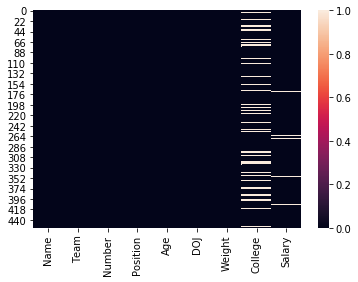

In [9]:
#check null or missing values
sns.heatmap(salary_dataset.isnull())

In [10]:
salary_dataset = salary_dataset.drop(['College','Name','Team','DOJ'], axis=1)
#No relevance

In [11]:
salary_dataset.isnull().sum()

Number       0
Position     0
Age          0
Weight       0
Salary      11
dtype: int64

In [12]:
salary_dataset.Position.unique()

array(['PG', 'SF', 'SG', 'PF', 'C'], dtype=object)

In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
salary_dataset['Position'] = le.fit_transform(salary_dataset['Position'])

In [14]:
from sklearn.impute import SimpleImputer
# make copy to avoid changing original data (when Imputing)
new_data = salary_dataset.copy()

# make new columns indicating what will be imputed
cols_with_missing = (col for col in new_data.columns 
                                 if new_data[col].isnull().any())

# Imputation ( will fill the missing values in Age)
my_imputer = SimpleImputer()
new_data = pd.DataFrame(my_imputer.fit_transform(new_data))
new_data.columns = salary_dataset.columns

In [15]:
new_data.isnull().sum()

Number      0
Position    0
Age         0
Weight      0
Salary      0
dtype: int64

In [16]:
new_data.Position.unique()

array([2., 3., 4., 1., 0.])

In [17]:
new_data.shape

(457, 5)

In [18]:
new_data.head()

,Number,Position,Age,Weight,Salary
0,0.0,2.0,25.0,180.0,7.730337e+06
1,99.0,3.0,25.0,235.0,6.796117e+06
2,30.0,4.0,27.0,205.0,4.842684e+06
3,28.0,4.0,22.0,185.0,1.148640e+06
4,8.0,1.0,29.0,231.0,5.000000e+06


In [19]:
new_data['Position'] = new_data['Position'].astype(int)
new_data['Age'] = new_data['Age'].astype(int)
new_data['Weight'] = new_data['Weight'].astype(int)
new_data['Number'] = new_data['Number'].astype(int)

In [20]:
new_data.head()

,Number,Position,Age,Weight,Salary
0,0,2,25,180,7.730337e+06
1,99,3,25,235,6.796117e+06
2,30,4,27,205,4.842684e+06
3,28,4,22,185,1.148640e+06
4,8,1,29,231,5.000000e+06


In [21]:
new_data['Salary'].describe()

count    4.570000e+02
mean     4.842684e+06
std      5.165781e+06
min      3.088800e+04
25%      1.100602e+06
50%      2.869440e+06
75%      6.331404e+06
max      2.500000e+07
Name: Salary, dtype: float64

In [22]:
new_data.Position.unique()

array([2, 3, 4, 1, 0])

In [23]:
new_data.Number.unique()

array([ 0, 99, 30, 28,  8, 90, 55, 41, 12, 36,  7,  4, 11, 13, 44, 22, 21,
       24,  2, 10,  6,  1, 33, 14, 15, 17, 43,  3,  9, 42, 18, 23,  5, 39,
       31, 35, 20, 92, 54, 19, 40, 34, 45, 32, 25, 50, 37, 26, 16, 52, 27,
       77, 88])

In [24]:
new_data.Position.value_counts()

4    102
1    100
2     92
3     85
0     78
Name: Position, dtype: int64

In [25]:
new_data.Number.value_counts()

5     23
3     21
0     20
1     20
8     19
4     17
11    17
12    17
2     16
9     16
21    15
7     14
15    14
23    13
20    12
13    12
6     12
33    11
30    11
22    11
10    10
14    10
17    10
25    10
34     9
44     8
24     8
31     8
35     7
41     6
42     6
32     5
50     5
40     5
19     4
18     4
55     4
27     3
43     3
28     3
26     2
16     2
36     2
77     2
90     2
92     1
37     1
39     1
45     1
52     1
54     1
88     1
99     1
Name: Number, dtype: int64

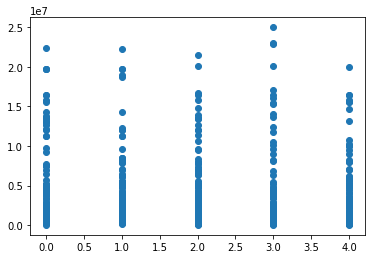

In [26]:
plt.scatter(new_data['Position'],new_data['Salary'])
plt.show()

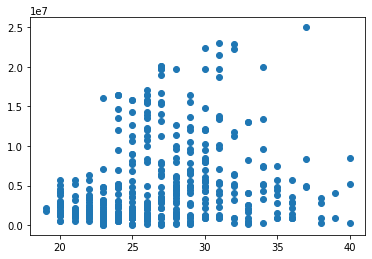

In [27]:
plt.scatter(new_data['Age'],new_data['Salary'])
plt.show()

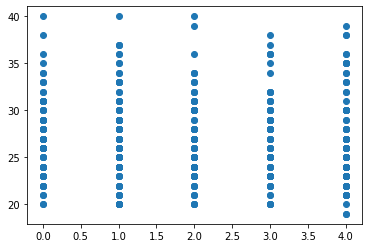

In [28]:
plt.scatter(new_data['Position'],new_data['Age'])
plt.show()

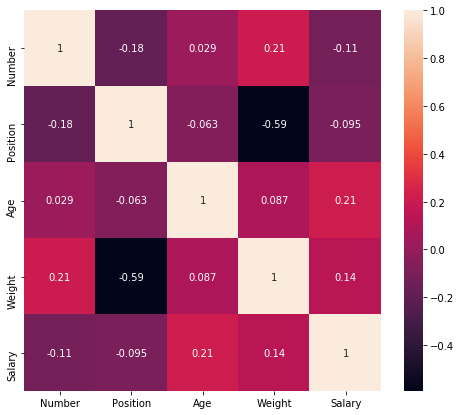

In [29]:
corr_hmap=salary_dataset.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [30]:
#mapping the data into numerical data using map function
new_data['Salary'] = new_data['Salary'].astype(int)
new_data.head()
test_data=new_data

In [31]:
test_data['Salary'] = test_data['Salary'].apply(lambda x: 1 if x > 500000 else 0 )

In [32]:
test_data.Salary.unique()

array([1, 0], dtype=int64)

In [33]:
test_data.groupby('Salary').size()

Salary
0     25
1    432
dtype: int64

In [34]:
new_data=test_data

In [35]:
new_data.head()

,Number,Position,Age,Weight,Salary
0,0,2,25,180,1
1,99,3,25,235,1
2,30,4,27,205,1
3,28,4,22,185,1
4,8,1,29,231,1


In [36]:
new_data['Salary'].describe()

count    457.000000
mean       0.945295
std        0.227652
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Salary, dtype: float64

In [37]:
X = new_data.iloc[:,0:-1]
Y = new_data.iloc[:,-1]

In [38]:
X.shape

(457, 4)

In [39]:
Y.shape

(457,)

In [45]:
# split out validation dataset for the end
from sklearn.model_selection import train_test_split

array = new_data.values
validation_size = 0.2
seed = 7
X_train, X_test , Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [46]:
# test options
num_folds = 10
seed = 50
scoring = 'accuracy'

In [47]:
# check some algorithms
LR=LogisticRegression()
KNN=KNeighborsClassifier()
CART=DecisionTreeClassifier()
NB=GaussianNB()
SVM=SVC()
models = []
models.append(('LR', LR))
models.append(('KNN', KNN))
models.append(('CART', CART ))
models.append(('NB', NB))
models.append(('SVM', SVM))

In [48]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.942342 (0.037975)
KNN: 0.942342 (0.037975)
CART: 0.901276 (0.058887)
NB: 0.942342 (0.037975)
SVM: 0.942342 (0.037975)


In [49]:
from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
results = []
names = []
score=[]
for name, model in models:
    model.fit(X_train,Y_train)
    pre=model.predict(X_test)
    AS=accuracy_score(Y_test,pre)
    print('***',name,'*** = ')
    print('Accuracy_score = ',AS)
    score.append(AS*100)

*** LR *** = 
Accuracy_score =  0.9565217391304348
*** KNN *** = 
Accuracy_score =  0.9565217391304348
*** CART *** = 
Accuracy_score =  0.8913043478260869
*** NB *** = 
Accuracy_score =  0.9565217391304348
*** SVM *** = 
Accuracy_score =  0.9565217391304348


In [50]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
# ensembles
AB=AdaBoostClassifier()
GBM= GradientBoostingClassifier()
RF=RandomForestClassifier()
ensembles = []
# Boosting methods
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
ensembles.append(('RF', RandomForestClassifier()))

In [51]:
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.926051 (0.054430)
GBM: 0.928754 (0.044446)
RF: 0.939640 (0.040428)


In [52]:
names = []
for name, model in ensembles:
    model.fit(X_train,Y_train)
    pre=model.predict(X_test)
    AS=accuracy_score(Y_test,pre)
    print('***',name,'*** = ')
    print('Accuracy_score = ',AS)
    score.append(AS*100)

*** AB *** = 
Accuracy_score =  0.9565217391304348
*** GBM *** = 
Accuracy_score =  0.9239130434782609
*** RF *** = 
Accuracy_score =  0.9456521739130435


In [53]:
#Logistic model is the best model
from sklearn.externals import joblib

#Save the model

joblib.dump(LR,'salary_LRfile.obj')

['salary_LRfile.obj']